In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## RandomForest classifier

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

In [2]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=2) 
# theoretically, more trees lead to stable model. Practically, 100~200 would be enough in most problems.
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [3]:
forest.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [212]:
# prediction results of a random tree
forest.estimators_[0].predict(X_test)

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0.])

In [213]:
y_test_hat = forest.predict(X_test)
accuracy_score(y_test, y_test_hat)

0.951048951048951

In [214]:
forest.feature_importances_

array([0.04332379, 0.0138174 , 0.03895232, 0.06490172, 0.00475956,
       0.01864941, 0.04015283, 0.07765823, 0.00338013, 0.00466148,
       0.00764463, 0.00475695, 0.02224006, 0.03283145, 0.00187008,
       0.00377671, 0.00827286, 0.00490933, 0.0027356 , 0.00398173,
       0.16789906, 0.01956873, 0.07582788, 0.120973  , 0.01102068,
       0.00906924, 0.02991808, 0.14298749, 0.0085679 , 0.01089166])

(-1.0, 30.0)

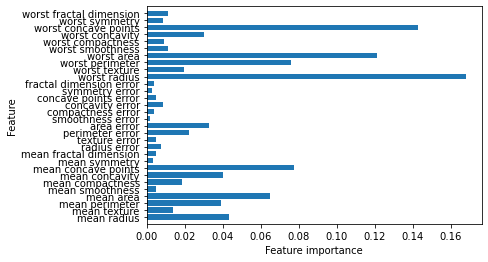

In [215]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

## Build random forest with Decision tree classifier

#### training phase

In [9]:
n_estimators=100

random_trees=[]
for i in range(n_estimators):
    np.random.seed(i)
    
    # bootstrap sampling
    idx = np.random.choice(X_train.shape[0], X_train.shape[0], replace=True)
    
    X_train_base = X_train[idx,:]
    y_train_base = y_train[idx]
    
    # train random tree
    rt = DecisionTreeClassifier(max_features='sqrt')
    rt.fit(X_train_base, y_train_base)
    
    random_trees.append(rt)  

#### test phase

In [11]:
y_test_hats=[]
for i in range(n_estimators):    
    # get y_test_hat using each random tree and store them
    y_test_hats.append(random_trees[i].predict(X_test))

y_test_hats = np.stack(y_test_hats).T

In [12]:
y_test_hats.shape

(143, 100)

In [13]:
y_test_hats

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [221]:
# get the result of majority voting
from scipy import stats
y_test_hat_voted = stats.mode(y_test_hats, axis=1)[0].squeeze()

In [222]:
y_test_hat_voted

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [223]:
accuracy_score(y_test, y_test_hat_voted)

0.951048951048951

In [224]:
# accuracy score of each random tree
for i in range(n_estimators):
    print(accuracy_score(y_test, y_test_hats[:,i]))
# each base model has relatively low accuracy, but with the ensemble method we can get the higher accuracy in the end.

0.9300699300699301
0.9370629370629371
0.8951048951048951
0.9230769230769231
0.8951048951048951
0.916083916083916
0.8951048951048951
0.9020979020979021
0.9090909090909091
0.8881118881118881
0.9300699300699301
0.9090909090909091
0.916083916083916
0.9090909090909091
0.9370629370629371
0.8881118881118881
0.8671328671328671
0.9020979020979021
0.9090909090909091
0.916083916083916
0.9090909090909091
0.916083916083916
0.9440559440559441
0.9020979020979021
0.916083916083916
0.8601398601398601
0.9020979020979021
0.916083916083916
0.9020979020979021
0.916083916083916
0.916083916083916
0.916083916083916
0.9020979020979021
0.9090909090909091
0.9370629370629371
0.9300699300699301
0.9440559440559441
0.8881118881118881
0.8811188811188811
0.8671328671328671
0.9230769230769231
0.916083916083916
0.8811188811188811
0.9370629370629371
0.9020979020979021
0.9090909090909091
0.8951048951048951
0.916083916083916
0.916083916083916
0.8811188811188811
0.8951048951048951
0.9300699300699301
0.9230769230769231
0.888

### **Hard voting** (Majority voting) vs **Soft voting** (Averaging probabilities)

**Hard voting** : Predict class label as the class that represents the majority (mode) of the class labels predicted by each individual classifier.    
**Soft voting** : Predict class label using the averaging probabilities provided by each individual classifier.

In [14]:
y_test_probs=[]
for i in range(n_estimators):
    # get y_test_prob using each random tree and store them (".predict_proba")
    y_test_prob=random_trees[i].predict_proba(X_test)
    y_test_probs.append(y_test_prob)
    
y_test_probs = np.stack(y_test_probs)

In [16]:
y_test_probs.shape

(100, 143, 2)

In [17]:
# calculate average probabilities 
y_test_probs_mean = y_test_probs.mean(axis=0)

In [18]:
y_test_probs_mean

array([[0.03, 0.97],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.91, 0.09],
       [0.03, 0.97],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.65, 0.35],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.89, 0.11],
       [0.46, 0.54],
       [0.98, 0.02],
       [0.04, 0.96],
       [1.  , 0.  ],
       [0.91, 0.09],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.04, 0.96],
       [0.43, 0.57],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.64, 0.36],
       [0.  , 1.  ],
       [0.23, 0.77],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.85, 0.15],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.04, 0.96],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.88, 0.12],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.7 ,

In [188]:
# get 'y_test_hat' using the probabilities
y_test_hat = y_test_probs_mean.argmax(axis=1)

In [189]:
accuracy_score(y_test, y_test_hat)

0.951048951048951